# Chocolate Scraping with BeautifulSoup!

After eating chocolate bars your whole life, you’ve decided to go on a quest to find the greatest chocolate bar in the world. You’ve found a website that has over 1700 reviews of chocolate bars from all around the world. It’s displayed in the web browser on this page.

Some questions we thought about when we found this dataset were:
* Where are the best cocoa beans grown? 
* Which countries produce the highest-rated bars?


In [1]:
# We will need to import the necessary libraries for this project
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Let us make a request to the site to get the raw HTML, which we can turn into a BeautifulSoup object by using the **.get()** method of the requests module.

In [2]:
# Pass the URL into the requests.get() function
webpage_response = requests.get("https://content.codecademy.com/courses/beautifulsoup/cacao/index.html")

# Use "html.parser" as the parser and create a BeautifulSoup object called "soup". Call on the content from soup.
soup = BeautifulSoup(webpage_response.content, "html.parser")

# If we print(soup), we will realize that there are many table rows and thankfully we don't have to manually scape them!

## How are ratings distributed?

How many terrible chocolate bars are out there? How many earned a perfect 5? Lets make a histogram out of the data!

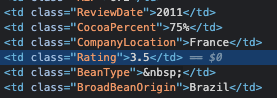

It looks like all of the rating data have a **class "Rating"**. We can use **.find_all()** to get all elements of a class "ClassName" with this syntax

In [3]:
# We use the .find_all( ) and attrs to get the data of ratings.
ratings_data = soup.find_all(attrs = {"class" : "Rating"})
print(ratings_data)

[<td class="Rating">Rating</td>, <td class="Rating">3.75</td>, <td class="Rating">2.75</td>, <td class="Rating">3</td>, <td class="Rating">3.5</td>, <td class="Rating">3.5</td>, <td class="Rating">2.75</td>, <td class="Rating">3.5</td>, <td class="Rating">3.5</td>, <td class="Rating">3.75</td>, <td class="Rating">4</td>, <td class="Rating">2.75</td>, <td class="Rating">3</td>, <td class="Rating">3.25</td>, <td class="Rating">3.75</td>, <td class="Rating">2.75</td>, <td class="Rating">3</td>, <td class="Rating">3.25</td>, <td class="Rating">4</td>, <td class="Rating">3.25</td>, <td class="Rating">3.5</td>, <td class="Rating">4</td>, <td class="Rating">3.5</td>, <td class="Rating">3.75</td>, <td class="Rating">3.75</td>, <td class="Rating">3.75</td>, <td class="Rating">2.75</td>, <td class="Rating">3.25</td>, <td class="Rating">3.5</td>, <td class="Rating">3.5</td>, <td class="Rating">2.75</td>, <td class="Rating">3</td>, <td class="Rating">3</td>, <td class="Rating">3.75</td>, <td class

In [4]:
# Now, we will create an empty list to store all the ratings inside!
ratings = []

# Loop through the ratings tags and get the text contained in each one. Add it to the ratings list. 
# As you do this, convert the rating to a float, so that the ratings list will be numerical. This should help with calculations later.

# For numbers, we will use .string
for rating in ratings_data[1:]:
    ratings.append(float(rating.string))
print(ratings)


[3.75, 2.75, 3.0, 3.5, 3.5, 2.75, 3.5, 3.5, 3.75, 4.0, 2.75, 3.0, 3.25, 3.75, 2.75, 3.0, 3.25, 4.0, 3.25, 3.5, 4.0, 3.5, 3.75, 3.75, 3.75, 2.75, 3.25, 3.5, 3.5, 2.75, 3.0, 3.0, 3.75, 2.75, 2.75, 2.75, 2.75, 3.0, 2.5, 2.5, 3.5, 3.5, 3.5, 3.5, 2.75, 3.0, 2.5, 2.5, 2.75, 2.5, 3.0, 3.25, 3.0, 3.25, 4.0, 3.75, 4.0, 3.0, 3.0, 2.75, 3.5, 3.0, 3.75, 3.0, 2.75, 2.75, 3.0, 3.25, 3.5, 3.0, 3.25, 3.25, 3.25, 3.25, 3.5, 3.75, 4.0, 4.0, 5.0, 3.0, 3.0, 3.5, 3.75, 4.0, 3.5, 3.5, 5.0, 4.0, 3.25, 2.75, 3.75, 3.75, 4.0, 3.0, 3.5, 3.0, 2.5, 2.75, 3.0, 3.5, 3.75, 3.5, 3.25, 3.25, 3.5, 3.75, 3.5, 4.0, 4.0, 3.75, 3.25, 3.25, 3.5, 3.5, 3.75, 3.5, 3.75, 4.0, 2.75, 3.25, 3.5, 3.25, 3.75, 4.0, 2.75, 1.75, 3.75, 3.25, 3.25, 3.5, 2.5, 2.75, 1.75, 3.0, 3.0, 3.25, 3.75, 2.75, 3.75, 3.75, 3.75, 3.75, 2.5, 3.0, 3.25, 3.5, 3.0, 2.5, 2.5, 2.75, 3.5, 3.5, 4.0, 3.25, 3.5, 3.75, 2.75, 3.5, 3.75, 3.25, 3.0, 3.25, 2.75, 2.75, 2.75, 2.75, 2.75, 2.75, 2.75, 3.5, 3.5, 3.25, 3.5, 2.75, 3.0, 3.5, 3.5, 3.5, 3.5, 4.0, 4.0, 3.75, 2.

Using Matplotlib, create a histogram of the ratings values:

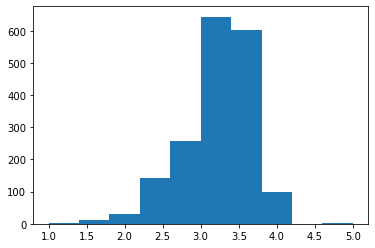

In [5]:
plt.hist(ratings)
plt.show()

## Which Chocolatier makes the best chocolate?


We want to now find the **10 most highly rated chocolatiers**. One way to do this is to make a DataFrame that has the chocolate companies in one column, and the ratings in another. Then, we can do a **groupby** to find the ones with the highest average rating.

First, let’s find all the tags on the webpage that contain the company names.

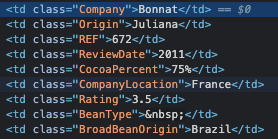

It looks like all of the rating data have a class **"Company"**. We can use **.find_all()** to get all elements of a class "ClassName" with this syntax

In [6]:
# We use the .find_all( ) and attrs to get the data of companies in the website.
company_data = soup.find_all(attrs = {"class" : "Company"})
print(company_data)

[<td class="Company">Company 
               (Maker-if known)
            </td>, <td class="Company">A. Morin</td>, <td class="Company">A. Morin</td>, <td class="Company">A. Morin</td>, <td class="Company">A. Morin</td>, <td class="Company">A. Morin</td>, <td class="Company">A. Morin</td>, <td class="Company">A. Morin</td>, <td class="Company">A. Morin</td>, <td class="Company">A. Morin</td>, <td class="Company">A. Morin</td>, <td class="Company">A. Morin</td>, <td class="Company">A. Morin</td>, <td class="Company">A. Morin</td>, <td class="Company">A. Morin</td>, <td class="Company">A. Morin</td>, <td class="Company">A. Morin</td>, <td class="Company">A. Morin</td>, <td class="Company">A. Morin</td>, <td class="Company">A. Morin</td>, <td class="Company">A. Morin</td>, <td class="Company">A. Morin</td>, <td class="Company">A. Morin</td>, <td class="Company">A. Morin</td>, <td class="Company">Acalli</td>, <td class="Company">Acalli</td>, <td class="Company">Adi</td>, <td class="Company

In [7]:
# Now, we will create an empty list so that we can store the data of companies.
companies = []

# For words, we will use .get_text()
for company in company_data[1:]:
    companies.append(company.get_text())
print(companies)

['A. Morin', 'A. Morin', 'A. Morin', 'A. Morin', 'A. Morin', 'A. Morin', 'A. Morin', 'A. Morin', 'A. Morin', 'A. Morin', 'A. Morin', 'A. Morin', 'A. Morin', 'A. Morin', 'A. Morin', 'A. Morin', 'A. Morin', 'A. Morin', 'A. Morin', 'A. Morin', 'A. Morin', 'A. Morin', 'A. Morin', 'Acalli', 'Acalli', 'Adi', 'Adi', 'Adi', 'Adi', 'Aequare (Gianduja)', 'Aequare (Gianduja)', 'Ah Cacao', "Akesson's (Pralus)", "Akesson's (Pralus)", "Akesson's (Pralus)", 'Alain Ducasse', 'Alain Ducasse', 'Alain Ducasse', 'Alain Ducasse', 'Alain Ducasse', 'Alexandre', 'Alexandre', 'Alexandre', 'Alexandre', 'Altus aka Cao Artisan', 'Altus aka Cao Artisan', 'Altus aka Cao Artisan', 'Altus aka Cao Artisan', 'Altus aka Cao Artisan', 'Altus aka Cao Artisan', 'Altus aka Cao Artisan', 'Altus aka Cao Artisan', 'Altus aka Cao Artisan', 'Altus aka Cao Artisan', 'Amano', 'Amano', 'Amano', 'Amano', 'Amano', 'Amano', 'Amano', 'Amano', 'Amano', 'Amatller (Simon Coll)', 'Amatller (Simon Coll)', 'Amatller (Simon Coll)', 'Amatller 

As of now, we have both the data from companies and ratings. We can now proceed by **creating a DataFrame** to combine both the data together. Now, let us create a DataFrame! Here's a reminder on how to create a DataFrame.

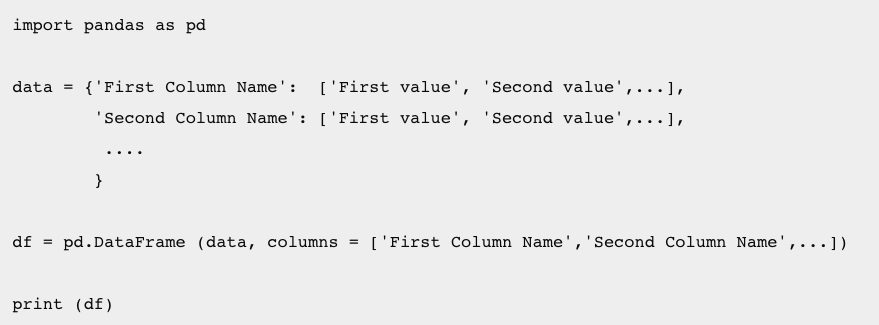

In [8]:
# Create DataFrame
data = {"Company" : companies,
       "Ratings" : ratings}

df = pd.DataFrame(data, columns = ["Company", "Ratings"])

# To get the first 5 rows, we use .head()
print(df.head())

    Company  Ratings
0  A. Morin     3.75
1  A. Morin     2.75
2  A. Morin     3.00
3  A. Morin     3.50
4  A. Morin     3.50


Use .groupby() to group your DataFrame by Company and take the average of the grouped ratings.

Then, use the .nlargest() command to get the 10 highest rated chocolate companies. Print them out.


In [9]:
# Let us use the .groupby() to take the average of grouped ratings.
average_ratings = df.groupby("Company").Ratings.mean()

# Using .nlargest(10) to get 10 highest rated companies
top_10 = average_ratings.nlargest(10)
print(top_10)

Company
Tobago Estate (Pralus)                  4.000000
Heirloom Cacao Preservation (Zokoko)    3.875000
Ocelot                                  3.875000
Amedei                                  3.846154
Matale                                  3.812500
Patric                                  3.791667
Idilio (Felchlin)                       3.775000
Acalli                                  3.750000
Chocola'te                              3.750000
Christopher Morel (Felchlin)            3.750000
Name: Ratings, dtype: float64


## Is more Cocoa better? hmmmm....
We want to see if the chocolate experts tend to rate chocolate bars with higher levels of cacao to be better than those with lower levels of cacao. The cocoa percentages are in the table under the Cocoa Percent column.

Task:
- Using the same methods you used in the last couple of tasks, create a list that contains all of the cocoa percentages. 
- Store each percent as an integer, after stripping off the % character.

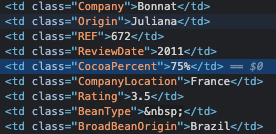

It looks like all of the rating data have a class **"CocoaPercent"**. We can use **.find_all()** to get all elements of a class "ClassName" with this syntax

In [10]:
# We use the .find_all( ) and attrs to get the data of Cocoa Percentage in the website.
cocoa_data = soup.find_all(attrs = {"class" : "CocoaPercent"})
print(cocoa_data)


[<td class="CocoaPercent">Cocoa
               Percent
            </td>, <td class="CocoaPercent">63%</td>, <td class="CocoaPercent">70%</td>, <td class="CocoaPercent">70%</td>, <td class="CocoaPercent">70%</td>, <td class="CocoaPercent">70%</td>, <td class="CocoaPercent">70%</td>, <td class="CocoaPercent">70%</td>, <td class="CocoaPercent">70%</td>, <td class="CocoaPercent">70%</td>, <td class="CocoaPercent">70%</td>, <td class="CocoaPercent">70%</td>, <td class="CocoaPercent">70%</td>, <td class="CocoaPercent">70%</td>, <td class="CocoaPercent">70%</td>, <td class="CocoaPercent">70%</td>, <td class="CocoaPercent">70%</td>, <td class="CocoaPercent">70%</td>, <td class="CocoaPercent">70%</td>, <td class="CocoaPercent">70%</td>, <td class="CocoaPercent">70%</td>, <td class="CocoaPercent">63%</td>, <td class="CocoaPercent">70%</td>, <td class="CocoaPercent">63%</td>, <td class="CocoaPercent">70%</td>, <td class="CocoaPercent">70%</td>, <td class="CocoaPercent">60%</td>, <td class="Cocoa

In [11]:
# Now, we will create an empty list for us to store the Cocoa Percentage data.
cocoa_percentage = []

for cocoa in cocoa_data[1:]:
    # the [:-1] is used to remove the % sign.
    cocoa_percentage.append(int(float(cocoa.string[:-1])))
print(cocoa_percentage)

[63, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 63, 70, 63, 70, 70, 60, 80, 88, 72, 55, 70, 70, 75, 75, 75, 65, 75, 75, 75, 75, 70, 70, 70, 70, 60, 60, 60, 60, 60, 60, 60, 80, 60, 60, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 85, 85, 72, 73, 64, 66, 75, 63, 70, 68, 70, 70, 75, 70, 70, 70, 70, 70, 70, 70, 63, 70, 66, 75, 85, 50, 75, 60, 75, 75, 75, 72, 75, 75, 70, 70, 73, 70, 70, 70, 70, 70, 70, 70, 70, 70, 73, 70, 68, 70, 70, 70, 70, 75, 70, 75, 72, 72, 72, 72, 100, 72, 72, 72, 72, 75, 72, 72, 80, 75, 72, 72, 72, 68, 72, 70, 77, 75, 70, 80, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 80, 65, 70, 65, 73, 72, 80, 70, 70, 90, 64, 64, 64, 71, 70, 70, 70, 83, 78, 83, 74, 74, 74, 73, 72, 72, 55, 64, 88, 72, 72, 70, 74, 64, 72, 76, 76, 78, 86, 72, 75, 70, 65, 70, 78, 75, 65, 75, 65, 71, 75, 68, 70, 70, 70, 70, 70, 82, 72, 82, 75, 75, 75, 70, 70, 75, 75, 75, 65, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 100, 75, 75, 77, 1

In [12]:
# Adding Cocoa Percentage Data into our existing DataFrame (df)
df["CocoaPercentage"] = cocoa_percentage
print(df.head())

    Company  Ratings  CocoaPercentage
0  A. Morin     3.75               63
1  A. Morin     2.75               70
2  A. Morin     3.00               70
3  A. Morin     3.50               70
4  A. Morin     3.50               70


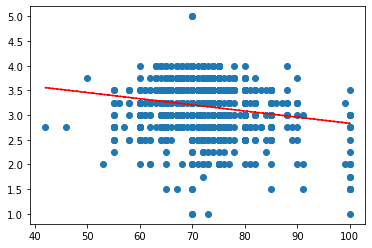

In [14]:
plt.cla()
plt.scatter(df.CocoaPercentage, df.Ratings)
z = np.polyfit(df.CocoaPercentage, df.Ratings, 1)
line_function = np.poly1d(z)
plt.plot(df.CocoaPercentage, line_function(df.CocoaPercentage), "r--")
plt.show()

A scatter plot (aka scatter chart, scatter graph) uses dots to represent values for two different numeric variables. The position of each dot on the horizontal and vertical axis indicates values for an individual data point. Scatter plots are used to observe relationships between variables.

Based on the scatter plot above, we can infer that there is no correlation between the Ratings and Cocoa Percentage! :D